In [1]:
import numpy as np
from numpy import sin, pi

def sin_model(t, B, A ,P, t0):
    return A*sin((t/P + t0)*2*pi) + B

In [2]:
np.random.seed(42)

n_data = 20

# time of observations
t = np.random.uniform(0, 5, size=n_data)

# measurement values
yerr = 1.0
y = np.random.normal(sin_model(t, A=4.2, P=3, t0=0, B=1.0), yerr)

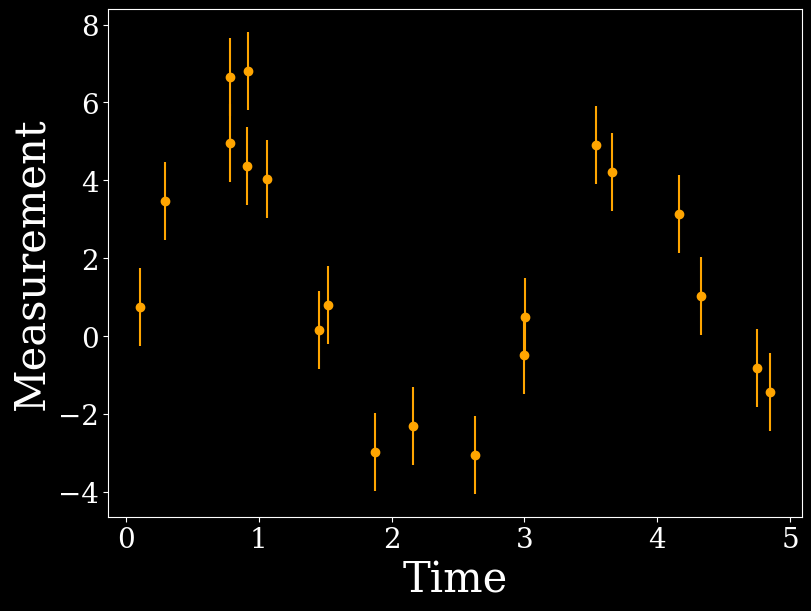

In [3]:
import matplotlib.pyplot as plt
rc = {"font.family" : "serif", 
    "mathtext.fontset" : "stix"}
plt.rcParams.update(rc) 
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams.update({'font.size': 14})
plt.style.use('dark_background')
import matplotlib as mpl
label_size = 20
font_size = 30
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

fig, axs = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
axs.errorbar(t, y, yerr=yerr, fmt='o', color='orange', label='Data')
axs.set_xlabel('Time', fontsize=font_size)
axs.set_ylabel('Measurement', fontsize=font_size)
plt.show()

In [4]:
parameters = ['B', 'A', 'P', 't0']

def prior_transform(cube):
    params = cube.copy()
    params[0] = cube[0] * 20 - 10
    params[1] = 10**(cube[1] * 4 - 2)
    params[2] = 10**(cube[2] * 2)
    params[3] = cube[3]
    return params

In [5]:
import scipy.stats

def log_likelihood(params):
    B, A, P, t0 = params
    y_model = sin_model(t, B, A, P, t0)
    loglike = - 0.5 * (((y_model - y)/yerr)**2).sum()
    return loglike    

In [6]:
from ultranest import ReactiveNestedSampler

sampler = ReactiveNestedSampler(parameters, log_likelihood, prior_transform,\
                                wrapped_params=[False, False, False, True])

In [7]:
result = sampler.run(min_num_live_points=400, dKL=np.inf, min_ess=100)

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  60 [-7.7587..-7.7583]*| it/evals=7920/66565 eff=11.9701% N=400    0  0  
[ultranest] Likelihood function evaluations: 66666
[ultranest]   logZ = -22.99 +- 0.1357
[ultranest] Effective samples strategy satisfied (ESS = 2130.3, need >100)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <inf nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.14 tail:0.01 total:0.14 required:<0.50
[ultranest] done iterating.


In [8]:
sampler.print_results()


logZ = -22.992 +- 0.256
  single instance: logZ = -22.992 +- 0.183
  bootstrapped   : logZ = -22.986 +- 0.255
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    B                   : -0.40 │ ▁▁ ▁▁▁▁▁▁▂▂▂▃▄▅▅▆▇▇▆▆▆▅▅▄▃▂▁▁▁▁▁▁▁▁▁▁ │1.72      0.67 +- 0.25
    A                   : 2.93  │ ▁▁▁▁▁▁▁▁▁▂▂▂▄▅▆▆▇▇▇▇▇▇▆▅▄▃▃▂▁▁▁▁▁▁▁▁▁ │5.79      4.38 +- 0.35
    P                   : 2.729 │ ▁▁▁▁▁▁▁▁▂▂▃▄▅▆▇▇▇▇▇▇▆▅▄▄▂▂▂▁▁▁▁▁▁▁ ▁▁ │3.304     2.998 +- 0.070
    t0                  : 0.00  │▅▁▁                                ▁▁▃▇│1.00      0.64 +- 0.46



In [29]:
pB, pA, pP, pt0 = sampler.results['samples'].T

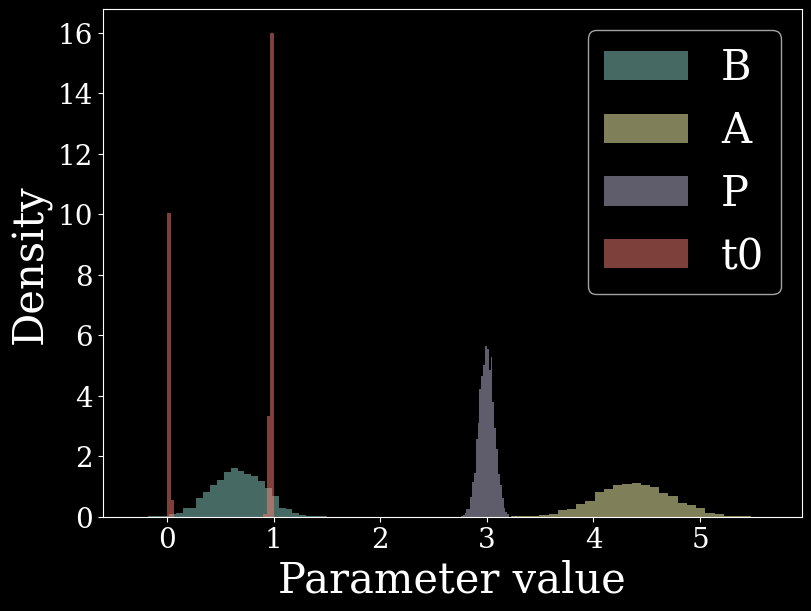

In [30]:
plt.figure(figsize=(8, 6), constrained_layout=True)
plt.hist(pB, bins=30, density=True, alpha=0.5, label='B')
plt.hist(pA, bins=30, density=True, alpha=0.5, label='A')
plt.hist(pP, bins=30, density=True, alpha=0.5, label='P')
plt.hist(pt0, bins=30, density=True, alpha=0.5, label='t0')
plt.xlabel('Parameter value', fontsize=font_size)
plt.ylabel('Density', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.show()